# **0. 사전 설정**
- 우리 회사는 다음 분기에 새로운 게임 개발을 계획하고 있습니다.    
하지만 어떤 게임을 설계해야 좋을지 쉽게 결정 내리지 못하고 있습니다.
- 저희 데이터 팀에서 지금까지 출고된 게임들의 선호도 및 트렌드 등 데이터 분석을 통해 어떤 게임을 설계하는 것이 합리적인지 알아보고자 합니다.

- 게임 데이터 팀 소속  
- 목표 : 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것
      다음 분기에 어떤 게임을 설계해야 할까?
- Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 하며
- 발표 대상 : 비데이터 직군
      생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력

- keywords  
Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization  
Sprint 2 : Hypothesis Test, CI, Bayesian  
Sprint 3 : DR, PCA, Cluster  

- 필수 요소  
지역에 따라서 선호하는 게임 장르가 다를까  
연도별 게임의 트렌드가 있을까  
출고량이 높은 게임에 대한 분석 및 시각화 프로세스  


# **1. 데이터 소개**
- 우리는 게임 출고량 데이터를 가지고 있습니다.  
- 이 데이터를 통해 다음 분기에 어떤 게임을 설계해야 좋을지 알아보려고 합니다.  
- 해당 데이터의 features는 아래와 같습니다.

`Name` : 게임의 이름입니다.  
`Platform` : 게임이 지원되는 플랫폼의 이름입니다.  
`Year` : 게임이 출시된 연도입니다.  
`Genre` : 게임의 장르입니다.  
`Publisher` : 게임을 제작한 회사입니다.  
`NA_Sales` : 북미 지역에서의 출고량입니다.  
`EU_Sales` : 유럽 지역에서의 출고량입니다.  
`JP_Sales` : 일본 지역에서의 출고량입니다.  
`Other_Sales` : 기타 지역에서의 출고량입니다.  

In [1]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [4]:
df = pd.read_csv('vgames2.csv')

# **2. 데이터 탐색**

## **2-1. 품질의 문제**

### **a. 시각적 탐색**

In [5]:
# 무작위 10개의 데이터 확인
df.sample(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16405,16406,CSI: Hard Evidence,Wii,2008.0,Adventure,Ubisoft,0.36,0.43,0,0.1
6743,6744,Capcom vs. SNK,DC,2000.0,Fighting,Virgin Interactive,0,0,0.22,0
13427,13428,Tenjin Ranman: Happy GO Lucky!!,PSP,2010.0,Adventure,Russel,0,0,0.01,0
13824,13825,Dropship: United Peace Force,PS2,2002.0,Simulation,Sony Computer Entertainment,0.05,0.04,0,0.01
8716,8717,Hey Arnold! The Movie,GBA,2002.0,Platform,THQ,0.19,0.07,0,0
8472,8473,Natsuiro no Sunadokei,PS2,2002.0,Adventure,Princess Soft,0,0,0.02,0
5431,5432,Tiger Woods PGA Tour 2005,GC,2004.0,Sports,Electronic Arts,0.1,0.03,0K,0
75,76,Deadliest Catch: Sea of Chaos,PS3,2010.0,Sports,Crave Entertainment,0.08,0,0,0.01
13326,13327,Wonder World Amusement Park,Wii,2008.0,Misc,Majesco Entertainment,0.04,0,0,0M
15825,15826,Ragnarok Odyssey,PS3,2014.0,Role-Playing,GungHo,0.03,0.01,0K,0.01


> **🔎 설명** 
- `Unnamed: 0`은 필요없는 컬럼입니다.
- `Year`는 `int`가 적당해 보이지만 소수점이 있는 것을 보아 `float`형태로 예상됩니다.  
- `**_Sales` 은 값의 단위가 모호하고 숫자 뒤에 문자가 삽입된 것도 보입니다.

### **b. 프로그래매틱 탐색**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


> **🔎 설명** 
- `Year`는 `float64`가 아닌 `int64`여야 합니다.  
- `**_Sales`는 `string`을 나타내는 `object`가 아닌 실수형인 `float64`가 적당합니다.  
- `Year`, `Genre`, `Publisher`는 결측값이 있음을 확인할 수 있습니다.

#### **b-1. 결측값 확인**

In [7]:
# 결측치 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
# 결측값 데이터 확인
df[df.Year.isnull() | df.Genre.isnull() | df.Publisher.isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...,...
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


> **🔎 설명** 
- 상관관계를 가진 features가 없고 평균값, 중앙값, 최빈값 등으로 채우는 것 또한 무리가 있어 보이기 때문에 현재의 데이터만으로는 결측치의 보정이 불가능해 보입니다.  
- 결측값이 포함된 행의 개수는 357으로 수작업이 가능한 수준이긴 하지만 데이터의 총 행의 수 16,598과 비교했을 때 그 비율이 0.0215%에 불과하기 때문에 제거해도 그 영향은 미미할 것 입니다.  

#### **b-2. `duplicated()`**  
중복된 값을 표시합니다.

In [9]:
#중복된 데이터 확인
df[df.duplicated()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


> **🔎 설명** 
- 중복된 데이터는 없습니다. 정제과정을 거친 후 다시 한번 확인해 봐야겠습니다.

#### **b-3. `value_counts()`**
고유한 값의 개수를 확인

In [10]:
# 장르 종류
print(df.Genre.value_counts())
print(df.Genre.value_counts().count())

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64
12


In [11]:
# 플랫폼 종류
print(df.Platform.value_counts())
print(df.Platform.value_counts().count())

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
31


In [12]:
print(df.Year.value_counts())
print(df.Year.value_counts().count())

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64
62


> **🔎 설명** 
- 장르가 총 12개, 플랫폼은 총 31개의로 구분되어 있음을 알 수 있습니다..
- 출시연도에 이상데이터는 앞의 두자리 혹은 세자리를 생략한 값으로 보입니다.

## **2-2. 구조적 문제**

In [13]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


> **🔎 설명** 
- Raw Data에는 출고량과 관련된 컬럼이 NA지역의 출고량, EU지역의 출고량, JP지역의 출고량, 기타 지역의 출고량으로 구분되어 있습니다. Tidy Data가 되기 위해서는 각각의 속성이 하나의 column을 구성해야 하기 때문에 출고 지역과 출고량이 각각의 column이 되도록 구성해줘야 합니다.

## **2-3. Summary**  

### **a. 데이터 품질의 문제**

- 지역별 출고량의 단위를 알 수 없습니다.  
- 지역별 출고량 데이터의 숫자 뒤에 문자가 삽입된 경우가 있습니다.  
- 지역별 출고량의 데이터 타입이 object로 되어 있습니다.  
- 'Unnamed: 0' 컬럼은 인덱스와 그 역할이 같으므로 삭제합니다.  
- 출시연도의 데이터 타입이 float으로 되어 있습니다.  
- 출시연도의 데이터가 불완전한 경우가 있습니다.
- 출시년도, 장르, 제작사에 missing values가 존재합니다.

### **b. 데이터 구조의 문제**
- NA_Sales,	EU_Sales,	JP_Sales,	Other_Sales에 지역과 출고량이라는 두 개의 요소가 존재합니다.

# **3. 데이터 정제**

In [14]:
# 원본 데이터 복사
df_clean = df.copy()

## **3-1. 품질의 문제**

> **🔎 설명** 
- 현재의 데이터 만으로는 결측치의 보정이 불가능해 보입니다.  
- 다행히 결측값이 포함된 행의 개수는 357으로 수작업이 가능한 수준이긴 하지만 데이터의 총 행의 수 16,598과 비교했을 때 그 비율이 0.0215%에 불과하기 때문에 제거해도 그 영향은 미미할 것 입니다.  
- 다만 결측값이 있는 행 중에 출고량의 합이 1백만 이상일 경우 수작업으로 결측값을 채워넣어 합류시키기로 결정했습니다.  
- 결측치가 포함된 행만 추출해서 또 하나의 데이터셋을 만들었습니다.
- 게임의 이름이 중복된 것을 다수(4946개) 확인하였으나 각기 다른 플랫폼으로 출시된 것으로 이상 데이터가 아님을 확인 하였습니다.  

In [15]:
# 'Unnamed: 0' 컬럼 제거
df_clean = df_clean.drop(columns = 'Unnamed: 0')

In [16]:
# 결측값이 포함된 행 추출
df_isnull = df_clean[df_clean.Year.isnull() | df_clean.Genre.isnull() | df_clean.Publisher.isnull()].reset_index(drop=True)
df_isnull.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
1,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
2,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
3,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
4,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01


In [17]:
# 결측값이 포함된 데이터셋에 'M' 제거
df_isnull.NA_Sales = df_isnull.NA_Sales.str.replace('M', '')
df_isnull.EU_Sales = df_isnull.EU_Sales.str.replace('M', '')
df_isnull.JP_Sales = df_isnull.JP_Sales.str.replace('M', '')
df_isnull.Other_Sales = df_isnull.Other_Sales.str.replace('M', '')

In [18]:
# 결측값이 포함된 데이터셋에 'K'가 제거된 데이터 구분을 위함
import re

def has_errors(inputString):
  return bool(re.search('[K]', inputString))

error_con_NA = df_isnull.NA_Sales.apply(has_errors)
error_con_EU = df_isnull.EU_Sales.apply(has_errors)
error_con_JP = df_isnull.JP_Sales.apply(has_errors)
error_con_Other = df_isnull.Other_Sales.apply(has_errors)

In [19]:
# 결측값이 포함된 데이터셋에 삽입된 'K' 제거
df_isnull.NA_Sales = df_isnull.NA_Sales.str.replace('K', '')
df_isnull.EU_Sales = df_isnull.EU_Sales.str.replace('K', '')
df_isnull.JP_Sales = df_isnull.JP_Sales.str.replace('K', '')
df_isnull.Other_Sales = df_isnull.Other_Sales.str.replace('K', '')

In [20]:
# 결측값이 포함된 데이터셋에 'K'가 삽입되었던 데이터를 1/1000 하기 위해 데이터타입 우선 변경
df_isnull.NA_Sales = df_isnull.NA_Sales.astype('float64')
df_isnull.EU_Sales = df_isnull.EU_Sales.astype('float64')
df_isnull.JP_Sales = df_isnull.JP_Sales.astype('float64')
df_isnull.Other_Sales = df_isnull.Other_Sales.astype('float64')

In [21]:
# 결측값이 포함된 데이터셋에 기본 단위를 million으로 설정했기 때문에 'K'가 삽입되었던 데이터를 1/1000
df_isnull.NA_Sales[error_con_NA] = df_isnull.NA_Sales[error_con_NA]*0.001
df_isnull.EU_Sales[error_con_EU] = df_isnull.EU_Sales[error_con_EU]*0.001
df_isnull.JP_Sales[error_con_JP] = df_isnull.JP_Sales[error_con_JP]*0.001
df_isnull.Other_Sales[error_con_Other] = df_isnull.Other_Sales[error_con_Other]*0.001

In [22]:
# 어느 한 지역의 출고량이라도 1백만 이상인 경우
df_isnull_critical = df_isnull[df_isnull.NA_Sales + df_isnull.EU_Sales + df_isnull.JP_Sales + df_isnull.Other_Sales > 1]
df_isnull_critical.reset_index(drop=True, inplace=True)
df_isnull_critical

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21
1,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79
2,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23
3,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.00,0.04
4,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29
5,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41
6,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1.10,0.06,0.00,0.18
7,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.00,0.07
8,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20
9,Wii Party,Wii,2010.0,NaN,Nintendo,1.79,3.53,2.49,0.68


In [23]:
# 결측값 메우기
df_isnull_critical.iloc[0, 2] = 2007
df_isnull_critical.iloc[1, 3] = "Role-Playing"
df_isnull_critical.iloc[2, 2] = 2006
df_isnull_critical.iloc[3, 2] = 1997
df_isnull_critical.iloc[4, 2] = 2008
df_isnull_critical.iloc[5, 2] = 2005
df_isnull_critical.iloc[5, 4] = "Yukes"
df_isnull_critical.iloc[6, 2] = 2004
df_isnull_critical.iloc[6, 3] = "Sports"
df_isnull_critical.iloc[7, 2] = 1999
df_isnull_critical.iloc[8, 2] = 2007
df_isnull_critical.iloc[9, 2] = 2010
df_isnull_critical.iloc[9, 3] = "Misc"
df_isnull_critical.iloc[10, 3] = "Role-Playing"
df_isnull_critical.iloc[11, 2] = 2002
df_isnull_critical.iloc[12, 2] = 1979
df_isnull_critical.iloc[13, 2] = 2003
df_isnull_critical.iloc[14, 2] = 2008
df_isnull_critical.iloc[15, 2] = 2011
df_isnull_critical.iloc[16, 3] = "Role-Playing"
df_isnull_critical.iloc[17, 2] = 2008
df_isnull_critical.iloc[18, 2] = 2007
df_isnull_critical.iloc[19, 2] = 2003
df_isnull_critical.iloc[20, 3] = "Adventure"
df_isnull_critical.iloc[21, 2] = 1998
df_isnull_critical.iloc[21, 4] = "Electronic Arts"
df_isnull_critical.iloc[22, 3] = "Racing"
df_isnull_critical.iloc[23, 3] = "Action"
df_isnull_critical.iloc[24, 2] = 2007
df_isnull_critical.iloc[25, 2] = 2010
df_isnull_critical.iloc[26, 2] = 2001
df_isnull_critical.iloc[27, 2] = 2002
df_isnull_critical.iloc[27, 4] = "Electronic Arts"
df_isnull_critical.iloc[28, 2] = 1977
df_isnull_critical.iloc[29, 3] = "Action"
df_isnull_critical.iloc[30, 4] = "Activision"
df_isnull_critical.iloc[31, 3] = "Action"
df_isnull_critical.iloc[32, 2] = 1978
df_isnull_critical.iloc[33, 3] = "Racing"

In [24]:
df_isnull_critical.Year = df_isnull_critical.Year.astype('int')

In [25]:
# 출시년도, 장르, 제작사의 missing values 제거
df_clean.dropna(inplace=True)

In [26]:
# 인덱스 재설정
df_clean = df_clean.reset_index(drop=True)

In [27]:
# 지역별 출고량 데이터의 숫자 뒤에 삽입된 'M' 제거
df_clean.NA_Sales = df_clean.NA_Sales.str.replace('M', '')
df_clean.EU_Sales = df_clean.EU_Sales.str.replace('M', '')
df_clean.JP_Sales = df_clean.JP_Sales.str.replace('M', '')
df_clean.Other_Sales = df_clean.Other_Sales.str.replace('M', '')

In [28]:
# 'K'가 제거된 데이터 구분을 위함
error_condition_NA = df_clean.NA_Sales.apply(has_errors)
error_condition_EU = df_clean.EU_Sales.apply(has_errors)
error_condition_JP = df_clean.JP_Sales.apply(has_errors)
error_condition_Other = df_clean.Other_Sales.apply(has_errors)

In [29]:
# 지역별 출고량 데이터의 숫자 뒤에 삽입된 'K' 제거
df_clean.NA_Sales = df_clean.NA_Sales.str.replace('K', '')
df_clean.EU_Sales = df_clean.EU_Sales.str.replace('K', '')
df_clean.JP_Sales = df_clean.JP_Sales.str.replace('K', '')
df_clean.Other_Sales = df_clean.Other_Sales.str.replace('K', '')

In [30]:
# 지역별 출고량 데이터의 숫자 뒤에 'K'가 삽입되었던 데이터를 1/1000 하기 위해 데이터타입 우선 변경
df_clean.NA_Sales = df_clean.NA_Sales.astype('float64')
df_clean.EU_Sales = df_clean.EU_Sales.astype('float64')
df_clean.JP_Sales = df_clean.JP_Sales.astype('float64')
df_clean.Other_Sales = df_clean.Other_Sales.astype('float64')

In [31]:
# 기본 단위를 million으로 설정했기 때문에 'K'가 삽입되었던 데이터를 1/1000
df_clean.NA_Sales[error_condition_NA] = df_clean.NA_Sales[error_condition_NA]*0.001
df_clean.EU_Sales[error_condition_EU] = df_clean.EU_Sales[error_condition_EU]*0.001
df_clean.JP_Sales[error_condition_JP] = df_clean.JP_Sales[error_condition_JP]*0.001
df_clean.Other_Sales[error_condition_Other] = df_clean.Other_Sales[error_condition_Other]*0.001

In [32]:
# 출시연도 데이터타입을 int로 변경
df_clean.Year = df_clean.Year.astype('int')

In [33]:
# 불완전한 출시연도 복구 - 2022년 이상 존재할 수 없음으로 23을 기준으로 잡음
for i in range(len(df_clean)):
  if df_clean.iloc[i,2] < 23:
    df_clean.iloc[i,2] = df_clean.iloc[i,2]+2000
  elif df_clean.iloc[i,2] >= 23 and df_clean.iloc[i,2] < 100:
    df_clean.iloc[i,2] = df_clean.iloc[i,2]+1900

In [37]:
df_clean.describe(include = 'all')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241,16241,16241.000000,16241,16241,16241.000000,16241.000000,16241.000000,16241.000000
unique,11295,31,NaN,12,575,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN
freq,12,2127,NaN,3240,1332,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.406748,NaN,NaN,0.265195,0.147378,0.078283,0.048234
std,NaN,NaN,5.832087,NaN,NaN,0.822431,0.508340,0.309272,0.189678
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000


In [38]:
# 중복된 Name 확인
df_clean[df_clean.Name.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01
15,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06
...,...,...,...,...,...,...,...,...,...
16234,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [39]:
# 플랫폼이 다른 경우로 데이터에 이상 없음
df_clean[df_clean.Name == "Ben 10 Ultimate Alien: Cosmic Destruction"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.0,0.04
3027,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010,Platform,D3Publisher,0.22,0.08,0.0,0.03
6124,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,0.0,0.04
14164,Ben 10 Ultimate Alien: Cosmic Destruction,PSP,2010,Platform,D3Publisher,0.10,0.09,0.0,0.05
14267,Ben 10 Ultimate Alien: Cosmic Destruction,X360,2010,Platform,D3Publisher,0.10,0.06,0.0,0.02
14557,Ben 10 Ultimate Alien: Cosmic Destruction,Wii,2010,Platform,D3Publisher,0.17,0.10,0.0,0.02


In [40]:
# 수작업한 결측치 데이터와 병합
df_clean = pd.concat([df_clean,df_isnull_critical], ignore_index=True)

## **3-2. 구조적 문제**
- NA_Sales, EU_Sales, JP_Sales, Other_Sales Columns은 각각 지역의 값과 출고량 값을 동시에 가지고 있습니다.  
- Tidy Data가 되기 위해서는 각각의 속성은 하나의 column을 구성해야 하기 때문에 출고 지역과 출고량이 각각의 column이 되도록 구성해줘야 합니다.

In [41]:
# 각 지역의 출고량 컬럼만 가져옴
df_sales = pd.DataFrame(df_clean.filter(like='Sales').stack())
df_sales.index = df_sales.index.droplevel(1)
df_sales = df_sales.reset_index()

In [42]:
# Country 컬럼을 만들어 지역 정보를 입력
df_sales['Country'] = ''

for i in range(len(df_sales)):
  if df_sales.index[i]%4 == 0:
    df_sales['Country'][i] = 'NA'
  elif df_sales.index[i]%4 == 1:
    df_sales['Country'][i] = 'EU'
  elif df_sales.index[i]%4 == 2:
    df_sales['Country'][i] = 'JP'
  elif df_sales.index[i]%4 == 3:
    df_sales['Country'][i] = 'Other'

In [43]:
df_sales.rename(columns={0:'Sales'}, inplace=True)
df_sales = df_sales[['index', 'Country', 'Sales']]
df_sales.set_index('index', inplace=True)

In [44]:
# 출고량 데이터와 조인
df_final = df_clean.join(df_sales)
df_final = df_final.drop(columns=['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'])
df_final = df_final.fillna('NA').reset_index(drop=True)

In [45]:
df_sales.head(10)

,Country,Sales
index,,
0,NA,0.04
0,EU,0.00
0,JP,0.00
0,Other,0.00
1,NA,0.17
1,EU,0.00
1,JP,0.00
1,Other,0.01
2,NA,0.00


## **3-3. 데이터셋 정의**
`df` : Raw Data  
`df_isnull_critical` : 결측값 중 의미있는 데이터  
`df_clean` : `df`에서 정제된 데이터 + `df_isnull_critical`  
`df_final` : `df_clean`를 기반한 tidy 데이터

# **4. 데이터 분석**

## **4-1. 지역별 게임 장르 선호도**

In [46]:
# 데이터 그룹 설정 : sum
Genre_sum = df_clean.groupby('Genre', as_index=False).sum()
NA_sum = Genre_sum.loc[:, ['Genre', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False)
EU_sum = Genre_sum.loc[:, ['Genre', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False)
JP_sum = Genre_sum.loc[:, ['Genre', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False)
Other_sum = Genre_sum.loc[:, ['Genre', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False)

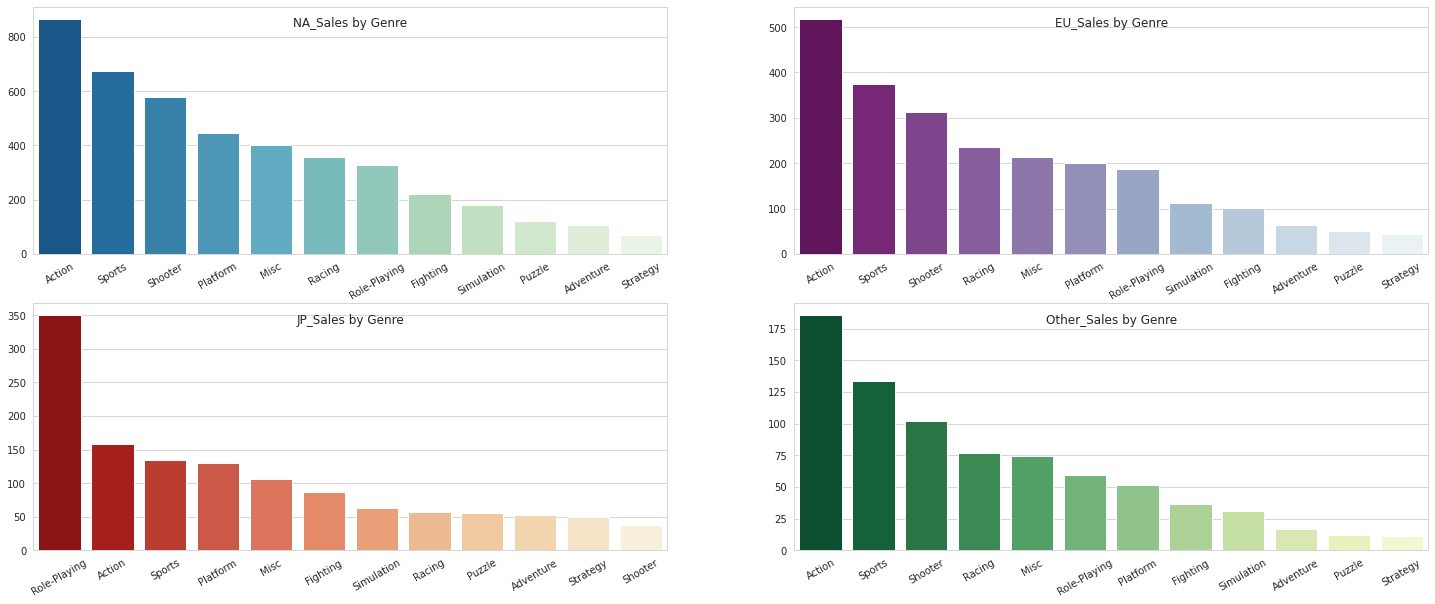

In [47]:
# 시각화
sns.set_style('whitegrid')

fig = plt.figure(figsize = (25,10))

area01 = fig.add_subplot(221)
sns.barplot(x='Genre', y='NA_Sales', data=NA_sum, ci=None, palette = "GnBu_r")
plt.title('NA_Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area02 = fig.add_subplot(222)
sns.barplot(x='Genre', y='EU_Sales', data=EU_sum, ci=None, palette = "BuPu_r")
plt.title('EU_Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area03 = fig.add_subplot(223)
sns.barplot(x='Genre', y='JP_Sales', data=JP_sum, ci=None, palette = "OrRd_r")
plt.title('JP_Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area04 = fig.add_subplot(224)
sns.barplot(x='Genre', y='Other_Sales', data=Other_sum, ci=None, palette = "YlGn_r")
plt.title('Other_Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [48]:
# 데이터 그룹 설정 : mean
Genre_mean = df_clean.groupby('Genre', as_index=False).mean()
NA_mean = Genre_mean.loc[:, ['Genre', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False)
EU_mean = Genre_mean.loc[:, ['Genre', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False)
JP_mean = Genre_mean.loc[:, ['Genre', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False)
Other_mean = Genre_mean.loc[:, ['Genre', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False)

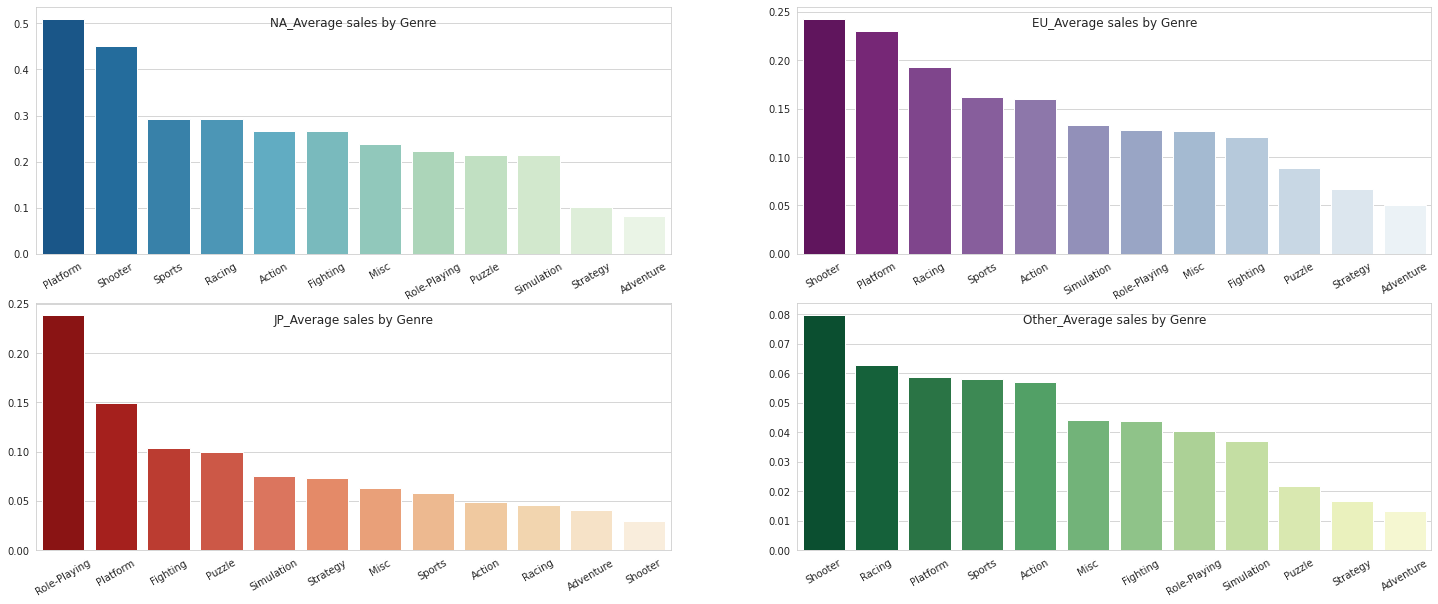

In [49]:
# 시각화
sns.set_style('whitegrid')

fig = plt.figure(figsize = (25,10))

area01 = fig.add_subplot(221)
sns.barplot(x='Genre', y='NA_Sales', data=NA_mean, ci=None, palette = "GnBu_r")
plt.title('NA_Average sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area02 = fig.add_subplot(222)
sns.barplot(x='Genre', y='EU_Sales', data=EU_mean, ci=None, palette = "BuPu_r")
plt.title('EU_Average sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area03 = fig.add_subplot(223)
sns.barplot(x='Genre', y='JP_Sales', data=JP_mean, ci=None, palette = "OrRd_r")
plt.title('JP_Average sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area04 = fig.add_subplot(224)
sns.barplot(x='Genre', y='Other_Sales', data=Other_mean, ci=None, palette = "YlGn_r")
plt.title('Other_Average sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
plt.show()

> **🔎 설명** 
- 전 지역에 걸쳐 Action과 Sports 장르의 총 출고량이 매우 높게 나오고 있습니다.  
- 일본은 다른 지역과 다른 양상을 보이는데 Role-Playing이 가장 많은 출고량을 기록했고 일본을 제외한 모든 지역 3순위인 Shooter가 최하위를 기록하고 있습니다.
- 평균 출고량에선 Platform과 Shooter 장르가 강세를 보이고 있으며, Action 장르는 중위권에 머무르고 있습니다.
- 일본의 평균 출고량으로 봤을 때 여전히 Role-Playing이 압도적입니다.

## **4-2. 연도별 게임 트렌드**

In [50]:
# 출시연도와 장르 기준으로 groupby
df_YG = df_clean.groupby(['Year', 'Genre'], as_index=False).sum()
df_YG['Total_Sales'] = df_YG['NA_Sales'] + df_YG['EU_Sales'] + df_YG['JP_Sales'] + df_YG['Other_Sales']

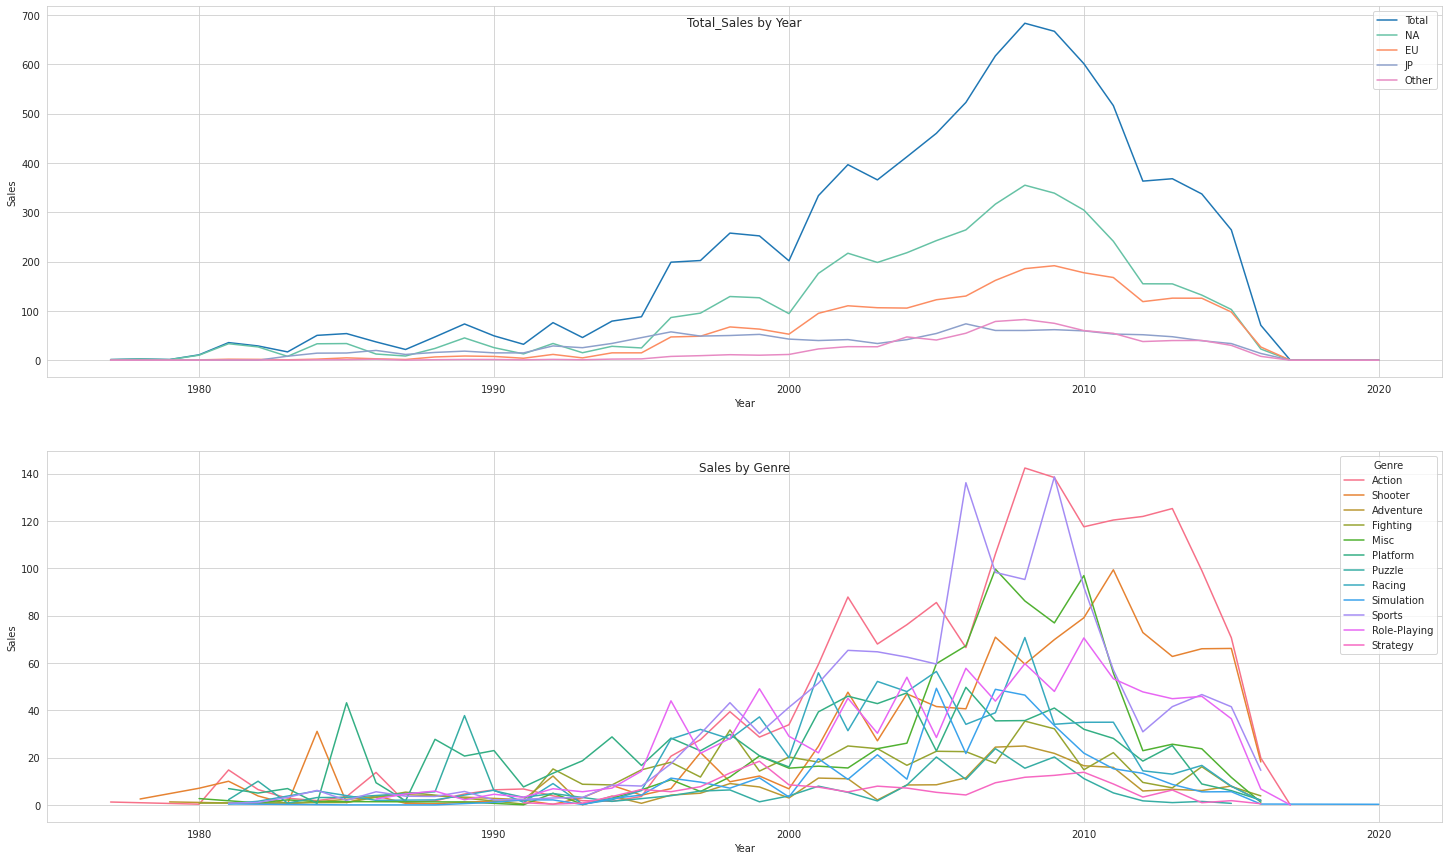

In [51]:
# 시각화 
sns.set_style('whitegrid')

fig = plt.figure(figsize = (25,15))

area01 = fig.add_subplot(211)
sns.lineplot(x='Year', y='Total_Sales', data=df_YG, estimator='sum', ci=None)
sns.lineplot(x='Year', y='Sales', data=df_final, hue='Country', estimator='sum', ci=None, palette='Set2')
plt.title('Total_Sales by Year', pad=-20)
plt.legend(('Total','NA', 'EU', 'JP', 'Other'))
plt.ylabel("Sales")
area02 = fig.add_subplot(212)
sns.lineplot(x='Year', y='Total_Sales', hue='Genre', data=df_YG, ci=None)
plt.title('Sales by Genre', pad=-20)
plt.ylabel("Sales")
plt.show()

> **🔎 설명** 
- 전세계 게임 시장은 1995년 8,811만개의 출고량을 기록하기까지 꾸준한 상승세를 보였고 이듬해인 1996년 1억9,873만개의 출고량을 기록하면서 2009년까지 가파른 상승세를 보였습니다.  
- 2008년 6억8,328만개를 기점으로 게임시장은 지속적인 하락세를 보여주고 있습니다.  
- 지역별로도 전세계 게임 시장의 흐름을 따라가는 모습입니다. 
- 시대에 따른 장르별 판매량을 시각화했을때 Action과 Sports의 강세가 눈에 띄고 그 이상은 시각적으로 구분하기 힘듭니다.  
그래서 시대별 트렌드를 좀 더 정확히 알아보기 위해서 출시연도를 4분위 하였고, 각 시대별 전체 출고량 기준 장르 출고량를 백분위로 가공했습니다.  

In [52]:
# 각 시대별 전체 출고량 기준 장르 출고량를 백분위로 가공
df_YGS = df_final.groupby(['Year', 'Genre'], as_index=False).Sales.sum()
bins = [1976, 1990, 1999, 2009, 2021]
labels = ['~90s', '1990s', '2000s', '2010s']
df_YGS['Year_levels'] = pd.cut(x=df_YGS.Year, bins=bins, labels=labels)
df_Year_ratio = df_YGS.groupby(['Year_levels', 'Genre'], as_index=False).Sales.sum()
df_Year_sum = df_Year_ratio.groupby('Year_levels', as_index=False).sum()

In [53]:
ratio = []

for i in df_Year_ratio['Year_levels']:
  if i == "~90s":
    ratio.append(df_Year_sum.iloc[0,1])
  elif i == "1990s":
    ratio.append(df_Year_sum.iloc[1,1])
  elif i == "2000s":
    ratio.append(df_Year_sum.iloc[2,1])
  elif i == "2010s":
    ratio.append(df_Year_sum.iloc[3,1])

df_Year_ratio['sum'] = ratio

In [54]:
df_Year_ratio['ratio'] = df_Year_ratio['Sales']/df_Year_ratio['sum']*100

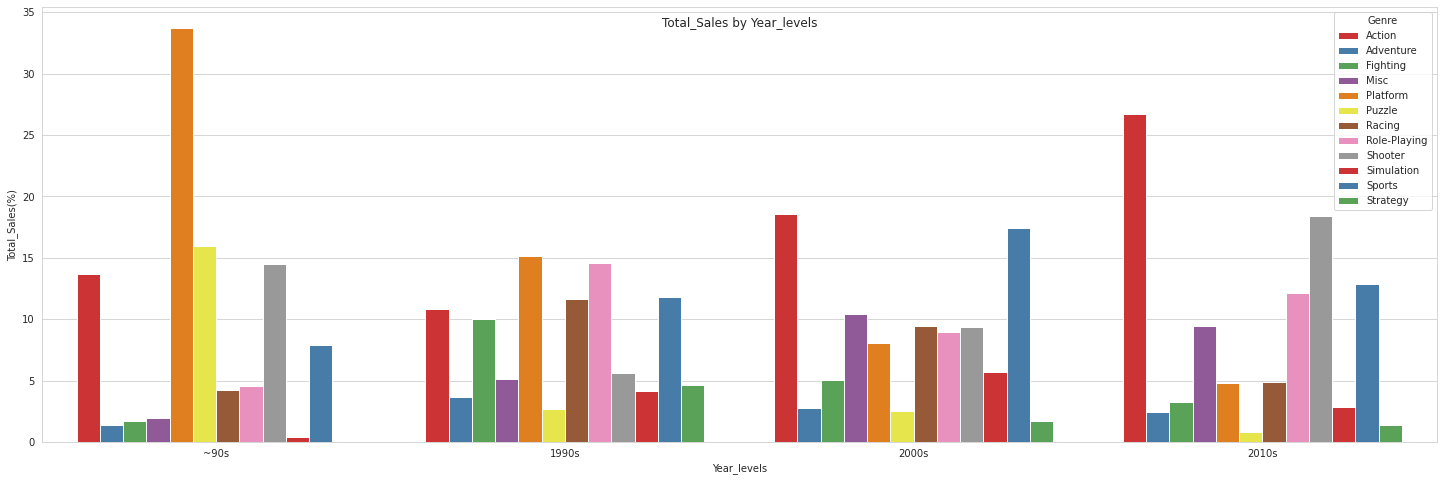

In [55]:
# 시각화
sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,8))
sns.barplot(x='Year_levels', y='ratio', hue='Genre', data=df_Year_ratio, estimator=np.sum, palette='Set1')
plt.title('Total_Sales by Year_levels', pad=-20)
plt.ylabel('Total_Sales(%)')
plt.show()

> **🔎 설명** 
- 90년대 이전의 경우 Platform 장르의 비율이 압도적으로 높습니다.  
- 90년대엔 다양한 장르가 경쟁하는 모습을 볼 수 있습니다. 90년대 중반에 폭발적인 성장을 할 수 있었던 이유 중 하나라고 여겨집니다.   
- 2000년대에는 Action과 Sports의 성장이 눈에 띄며 2010년대에는 성장세를 유지한 Action의 강세와 함께 Shooter가 새롭게 떠오르고 있는 것을 확인할 수 있습니다.




## **4-3. 높은 출고량의 게임 분석**

In [56]:
df_clean['Total_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']

In [57]:
# 최다출고량 탑20
df_game = df_clean.groupby(['Name', 'Genre'], as_index=False).sum().sort_values('Total_Sales', ascending=False).reset_index(drop=True)
df_game_top = df_game.loc[:19, :].drop(columns='Year')
df_game_top

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Sports,41.49,29.02,3.77,8.46,82.74
1,Grand Theft Auto V,Action,23.46,23.04,1.39,8.03,55.92
2,Super Mario Bros.,Platform,32.48,4.88,6.96,0.99,45.31
3,Tetris,Puzzle,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,Racing,15.85,12.88,3.79,3.31,35.83
5,Wii Sports Resort,Sports,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.38
7,Call of Duty: Black Ops,Shooter,17.59,9.50,0.59,3.36,31.04
8,Call of Duty: Modern Warfare 3,Shooter,15.58,11.29,0.62,3.35,30.84
9,New Super Mario Bros.,Platform,11.38,9.23,6.50,2.90,30.01


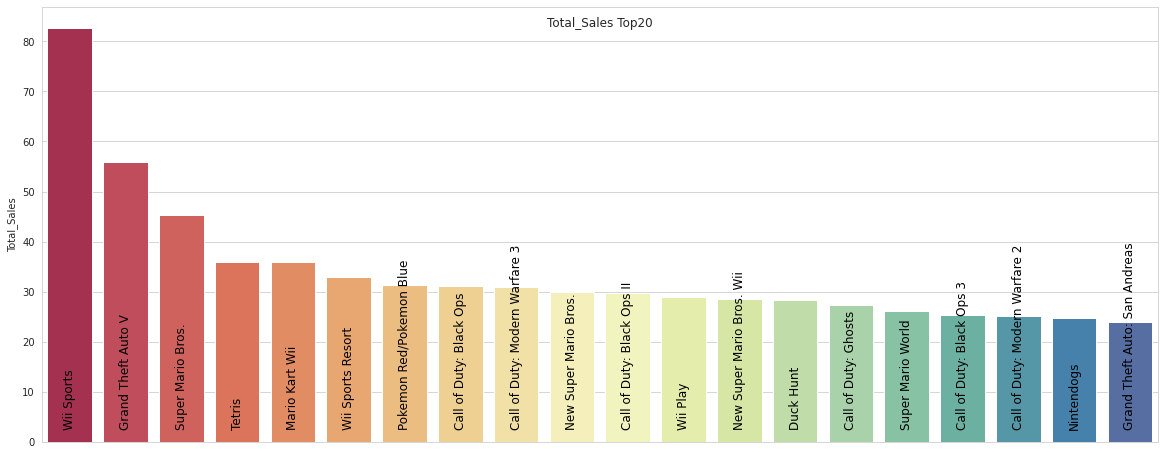

In [58]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (20,8))
p = sns.barplot(x='Name', y='Total_Sales', data=df_game_top, palette='Spectral')
plt.title('Total_Sales Top20', pad=-20)
plt.xlabel("")
plt.xticks([])

index = 0

for value in df_game_top['Total_Sales']:
  p.text(index, 3, df_game_top.Name[index], color='#000', size=12, rotation=90, ha='center', va='baseline')
  index += 1
plt.show()

> **🔎 설명** 
- Wii Sports는 8천2백만장 이상의 출고량을 기록했습니다.   
- Action 장르의 선전에도 불구하고 게임별 판매량 순위 20위 안에 GTA 시리즈만이 이름을 올렸습니다.  
결국 Action 장르의 총 출고량이 높은 이유는 출시된 게임수가 많기 때문임을 유추해볼 수 있습니다.

In [59]:
df_game2 = df_final.groupby(['Name', 'Genre', 'Country'], as_index=False).sum().sort_values('Sales', ascending=False).reset_index(drop=True)
df_game2 = df_game2.groupby(['Name', 'Country'], as_index=False).Sales.sum().sort_values('Sales', ascending=False).reset_index(drop=True)
df_game2_NA = df_game2.query("Country == 'NA'").reset_index(drop=True).loc[:4, :]
df_game2_EU = df_game2.query("Country == 'EU'").reset_index(drop=True).loc[:4, :]
df_game2_JP = df_game2.query("Country == 'JP'").reset_index(drop=True).loc[:4, :]
df_game2_Other = df_game2.query("Country == 'Other'").reset_index(drop=True).loc[:4, :]

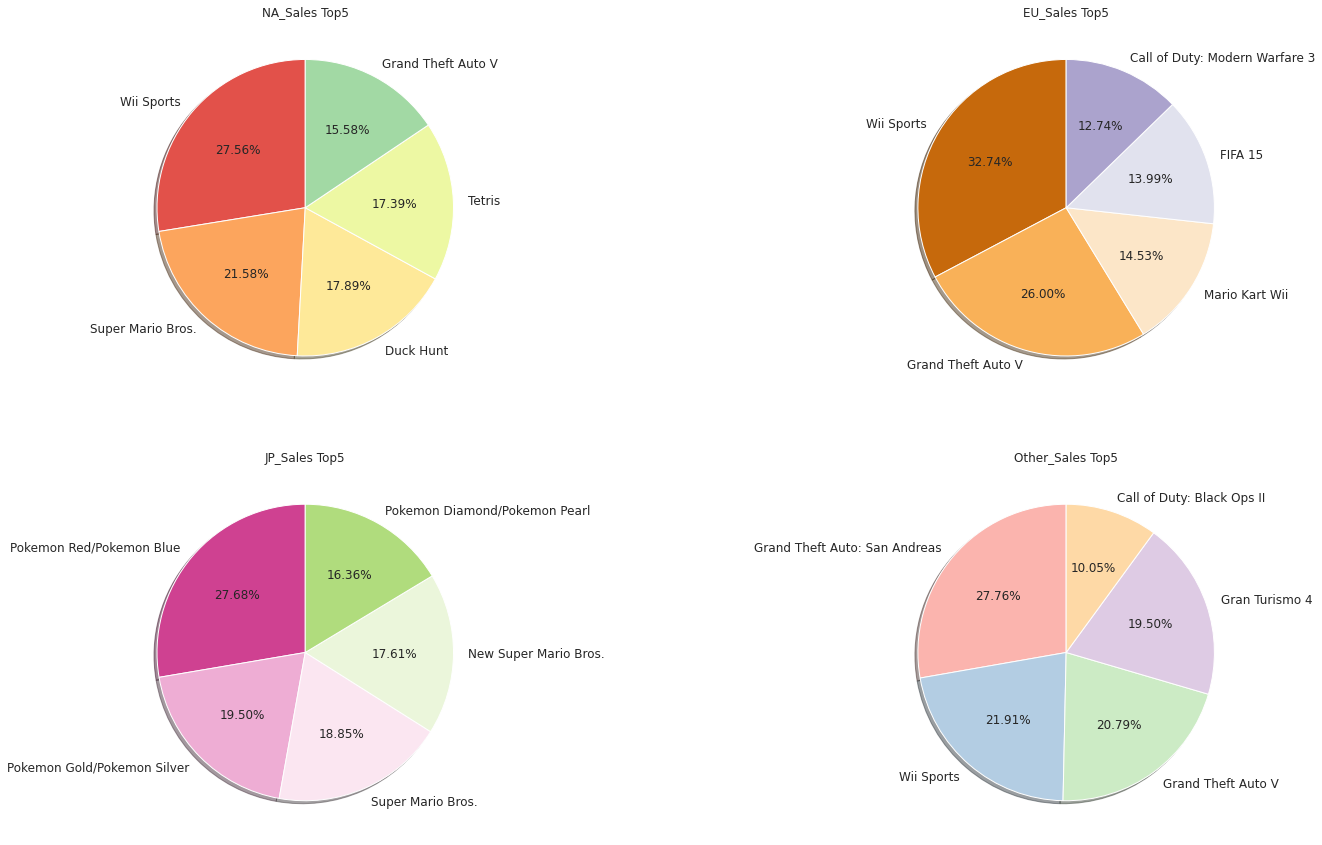

In [60]:
# 지역별 탑5
sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,15))

area01 = fig.add_subplot(221)
p1 = plt.pie(df_game2_NA.Sales, labels=df_game2_NA.Name, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'fontsize':12}, colors=sns.color_palette('Spectral'))
plt.title('NA_Sales Top5')

area02 = fig.add_subplot(222)
p1 = plt.pie(df_game2_EU.Sales, labels=df_game2_EU.Name, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'fontsize':12}, colors=sns.color_palette('PuOr'))
plt.title('EU_Sales Top5')

area03 = fig.add_subplot(223)
p1 = plt.pie(df_game2_JP.Sales, labels=df_game2_JP.Name, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'fontsize':12}, colors=sns.color_palette('PiYG'))
plt.title('JP_Sales Top5')

area04 = fig.add_subplot(224)
p1 = plt.pie(df_game2_Other.Sales, labels=df_game2_Other.Name, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'fontsize':12}, colors=sns.color_palette('Pastel1'))
plt.title('Other_Sales Top5')

plt.show()

> **🔎 설명**  
지역별로 나누어 살펴보겠습니다.  
- 일본을 제외한 모든 지역에서 비슷한 결을 보이고 있으나 북미의 Super Mario Bros.(Platform), 유럽의 FIFA15(Sports), 그 외 지역의 Gran Turismo 4(Racing)와 같이 그 지역만의 특색을 지니고 있습니다.  
- 일본은 세계 흐름과 전혀 다르게 Pokemon과 Super Mario가 강세를 보이고 있습니다. 이는 장르적 특성보다는 게임 IP(intelectual property)의 힘으로 판단됩니다.



## **4-4. 높은 출고량의 플랫폼 분석**

In [61]:
df_platform = df_final.groupby('Platform', as_index=False).sum().sort_values('Sales', ascending=False).reset_index(drop=True)

In [62]:
df_platform2 = df_final.groupby(['Platform', 'Country'], as_index=False).sum().sort_values('Sales', ascending=False).reset_index(drop=True)
df_platform2_NA = df_platform2[df_platform2.Country == 'NA'].reset_index(drop=True).loc[:4, :]
df_platform2_EU = df_platform2[df_platform2.Country == 'EU'].reset_index(drop=True).loc[:4, :]
df_platform2_JP = df_platform2[df_platform2.Country == 'JP'].reset_index(drop=True).loc[:4, :]
df_platform2_Other = df_platform2[df_platform2.Country == 'Other'].reset_index(drop=True).loc[:4, :]

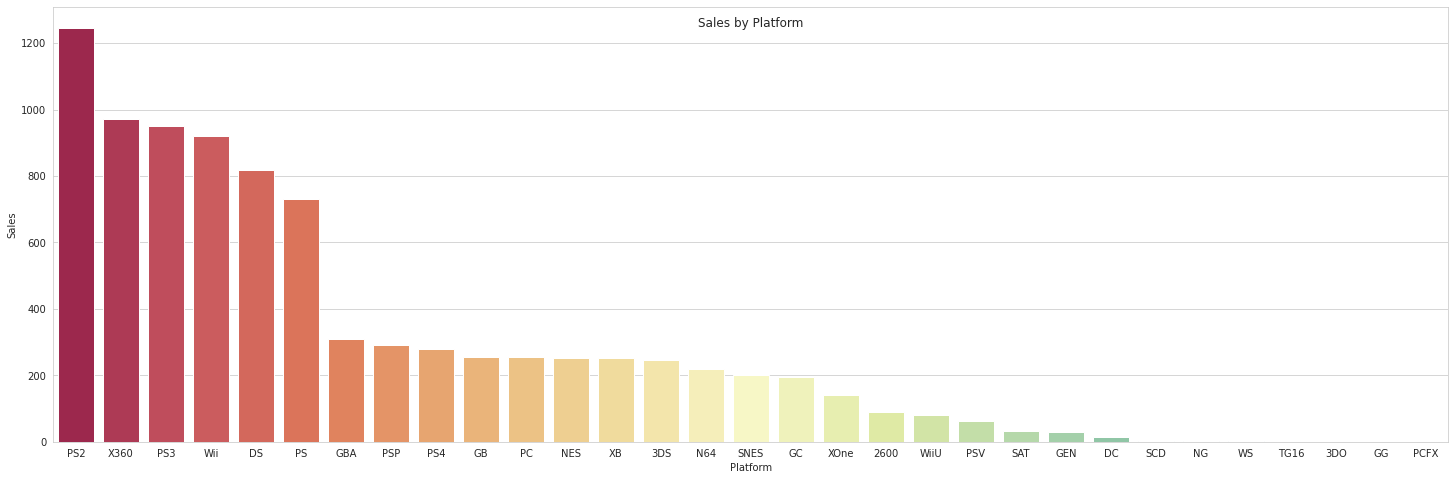

In [63]:
# 전지역 플랫폼 탑10
sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,8))

p = sns.barplot(x='Platform', y='Sales', data=df_platform, palette='Spectral')
plt.title('Sales by Platform', pad=-20)

plt.show()

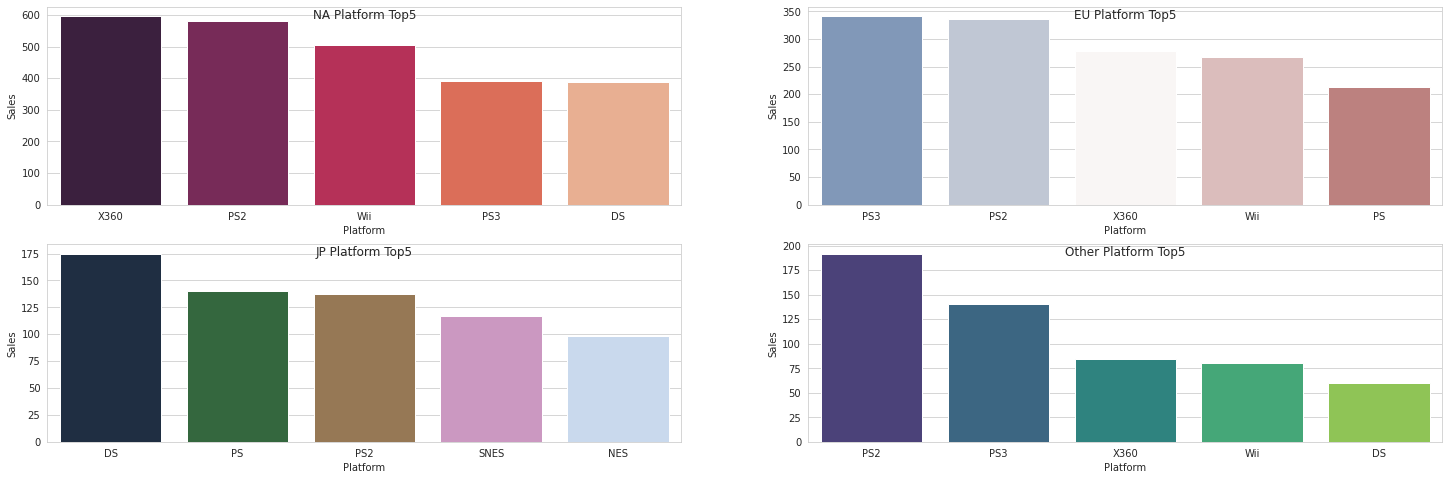

In [64]:
# 지역별 플랫폼 탑5
sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,8))

area02 = fig.add_subplot(221)
p = sns.barplot(x='Platform', y='Sales', data=df_platform2_NA, palette='rocket')
plt.title('NA Platform Top5', pad=-12)

area03 = fig.add_subplot(222)
p = sns.barplot(x='Platform', y='Sales', data=df_platform2_EU, palette='vlag')
plt.title('EU Platform Top5', pad=-12)

area04 = fig.add_subplot(223)
p = sns.barplot(x='Platform', y='Sales', data=df_platform2_JP, palette='cubehelix')
plt.title('JP Platform Top5', pad=-12)

area05 = fig.add_subplot(224)
p = sns.barplot(x='Platform', y='Sales', data=df_platform2_Other, palette='viridis')
plt.title('Other Platform Top5', pad=-12)

plt.show()

> **🔎 설명**  
- 플랫폼 별 출고량 1위는 PS2입니다. 그 뒤를 X360과 PS3, Wii가 각축을 벌이고 있습니다.  
- 지역별로 보면 북미는 전지역 추세와 달리 X360이 PS2를 미세한 차이로 앞서고 있습니다.  
- 유럽은 상대적 최신 플랫폼인 PS3가 PS2를 앞서고 있어 조금 더 트랜디한 모습을 보이고 있습니다.  
- 일본은 DS가 매우 높은 수치를 기록하고 있으며, X360이 5위권 밖으로 밀려나 있는 것이 특징입니다.  

## **4-5. 이원분산분석(two-way Anova)**  
분석을 진행하다보니 게임 출고량은 시대별로 각기 다른 특징들을 가지고 있다는 생각이 들었습니다. 가설 검정을 통해 이와 같은 생각이 참인지 거짓인지 판단하려 합니다.
- 귀무가설 : 시대와 장르에 따른 출고량의 평균은 같다.  
- 대립가설 : 시대와 장르에 따른 출고량의 평균은 다르다.  
- 분석에 사용한 데이터의 features는 다음과 같습니다.  
`Sales` : 시대와 장르에 따른 평균 출고량입니다.  
`Year_levels` : 시대 구분입니다.  
`Genre` : 게임의 장르입니다.  
- 종속변수 : `Sales`
- 독립변수 : `Year_levels`, `Genre`  
- 독립변수가 두개 이상이므로 이원분산분석(two-way Anova) 사용

In [65]:
df_anova = df_YGS[['Sales', 'Year_levels', 'Genre']]

In [66]:
df_anova

,Sales,Year_levels,Genre
0,1.25,~90s,Action
1,2.53,~90s,Shooter
2,1.30,~90s,Adventure
3,0.34,~90s,Action
4,0.77,~90s,Fighting
...,...,...,...
386,14.63,2010s,Sports
387,0.52,2010s,Strategy
388,0.01,2010s,Action
389,0.04,2010s,Role-Playing


In [67]:
# statsmodels을 활용한 이원분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Sales ~ C(Year_levels) * C(Genre)', df_anova).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Year_levels),3.0,71302.939069,23767.646356,86.527045,9.797292e-42
C(Genre),11.0,68376.232088,6216.021099,22.629668,1.055535e-34
C(Year_levels):C(Genre),33.0,61508.192768,1863.884629,6.785545,3.960076e-22
Residual,344.0,94491.500860,274.684596,NaN,NaN


> **🔎 설명** 
- Year_levels :  p < 0.05로 유의미. 즉 Year_levels에 따라 평균에 차이가 난다고 볼 수 있습니다.  
- Genre : p < 0.05로 유의미. 즉 Genre에 따라 평균에 차이가 난다고 볼 수 있습니다.  
- Year_levels:Genre : p < 0.05로 유의미. 상호작용 효과도 있다고 볼 수 있습니다.

## **4-6. 2010년 이후 출시 게임 데이터 분석**
- 이원분산분석(two-way Anova)을 통해 시대와 장르에 따른 출고량 평균은 다르다는 결과를 얻었습니다.  
이번 분석은 다음 분기에 설계할 게임에 그 목적이 있는 바, 최신 트랜드에 주목할 필요가 있습니다.  
따라서 지금부터는 2010년 이후의 데이터를 취사선택하여 데이터 분석을 진행하도록 하겠습니다.

In [68]:
df_2010 = df_clean[df_clean.Year > 2009].reset_index(drop=True)
df_2010

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
1,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
4,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
...,...,...,...,...,...,...,...,...,...,...
5121,Wii Party,Wii,2010,Misc,Nintendo,1.79,3.53,2.49,0.68,8.49
5122,LEGO Harry Potter: Years 5-7,Wii,2011,Action,Warner Bros. Interactive Entertainment,0.76,0.47,0.00,0.13,1.36
5123,Call of Duty: Black Ops,PC,2010,Shooter,Activision,0.58,0.81,0.00,0.24,1.63
5124,Skylanders Giants,PS3,2012,Action,Activision,0.35,0.52,0.00,0.22,1.09


In [69]:
df_tidy_2010 = df_final[df_final.Year > 2009].reset_index(drop=True)
df_tidy_2010

,Name,Platform,Year,Genre,Publisher,Country,Sales
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,NA,0.00
1,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,EU,0.00
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,JP,0.02
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,Other,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,NA,0.04
...,...,...,...,...,...,...,...
20499,Skylanders Giants,PS3,2012,Action,Activision,Other,0.22
20500,Bloodborne,PS4,2015,Action,Sony Computer Entertainment,NA,1.00
20501,Bloodborne,PS4,2015,Action,Sony Computer Entertainment,EU,0.76
20502,Bloodborne,PS4,2015,Action,Sony Computer Entertainment,JP,0.26


### **a. 2010년 이후 지역별 장르 선호도**

In [70]:
# 데이터 그룹 설정
Genre2010_sum = df_2010.groupby('Genre', as_index=False).sum()
NA2010_sum = Genre2010_sum.loc[:, ['Genre', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False)
EU2010_sum = Genre2010_sum.loc[:, ['Genre', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False)
JP2010_sum = Genre2010_sum.loc[:, ['Genre', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False)
Other2010_sum = Genre2010_sum.loc[:, ['Genre', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False)

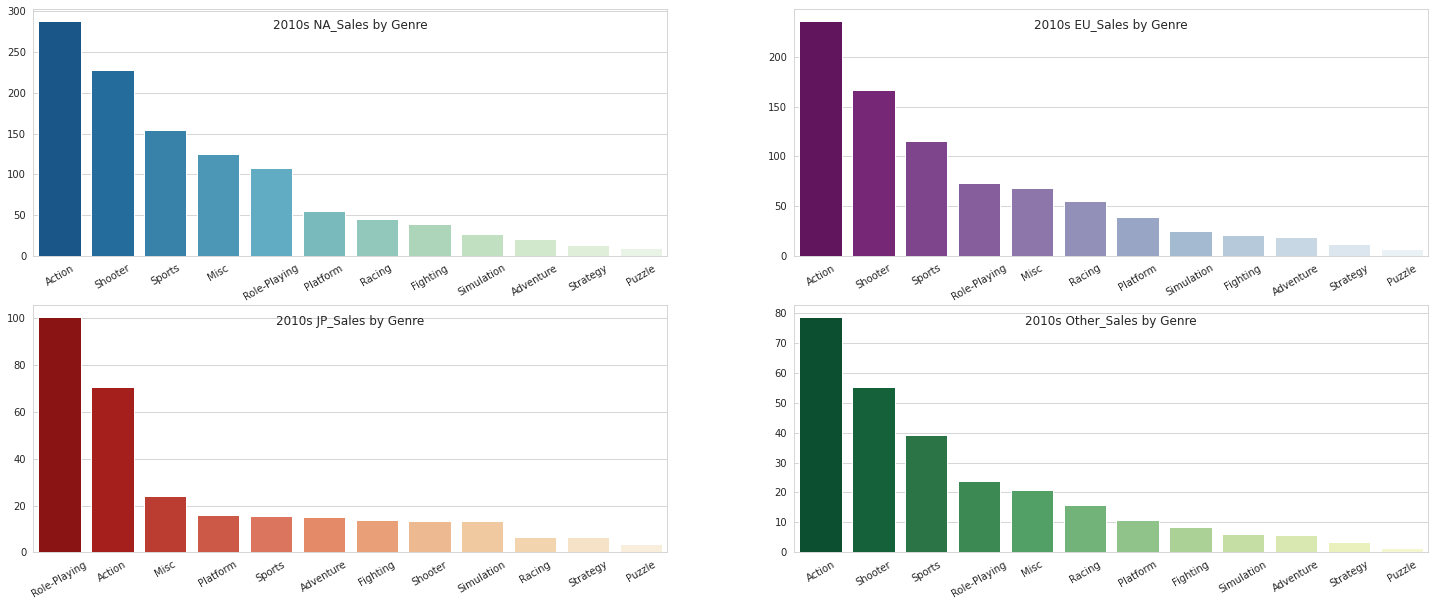

In [71]:
# 시각화
sns.set_style('whitegrid')

fig = plt.figure(figsize = (25,10))

area01 = fig.add_subplot(221)
sns.barplot(x='Genre', y='NA_Sales', data=NA2010_sum, ci=None, palette = "GnBu_r")
plt.title('2010s NA_Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area02 = fig.add_subplot(222)
sns.barplot(x='Genre', y='EU_Sales', data=EU2010_sum, ci=None, palette = "BuPu_r")
plt.title('2010s EU_Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area03 = fig.add_subplot(223)
sns.barplot(x='Genre', y='JP_Sales', data=JP2010_sum, ci=None, palette = "OrRd_r")
plt.title('2010s JP_Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area04 = fig.add_subplot(224)
sns.barplot(x='Genre', y='Other_Sales', data=Other2010_sum, ci=None, palette = "YlGn_r")
plt.title('2010s Other_Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [72]:
# 데이터 그룹 설정
Genre2010_mean = df_2010.groupby('Genre', as_index=False).mean()
NA2010_mean = Genre2010_mean.loc[:, ['Genre', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False)
EU2010_mean = Genre2010_mean.loc[:, ['Genre', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False)
JP2010_mean = Genre2010_mean.loc[:, ['Genre', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False)
Other2010_mean = Genre2010_mean.loc[:, ['Genre', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False)

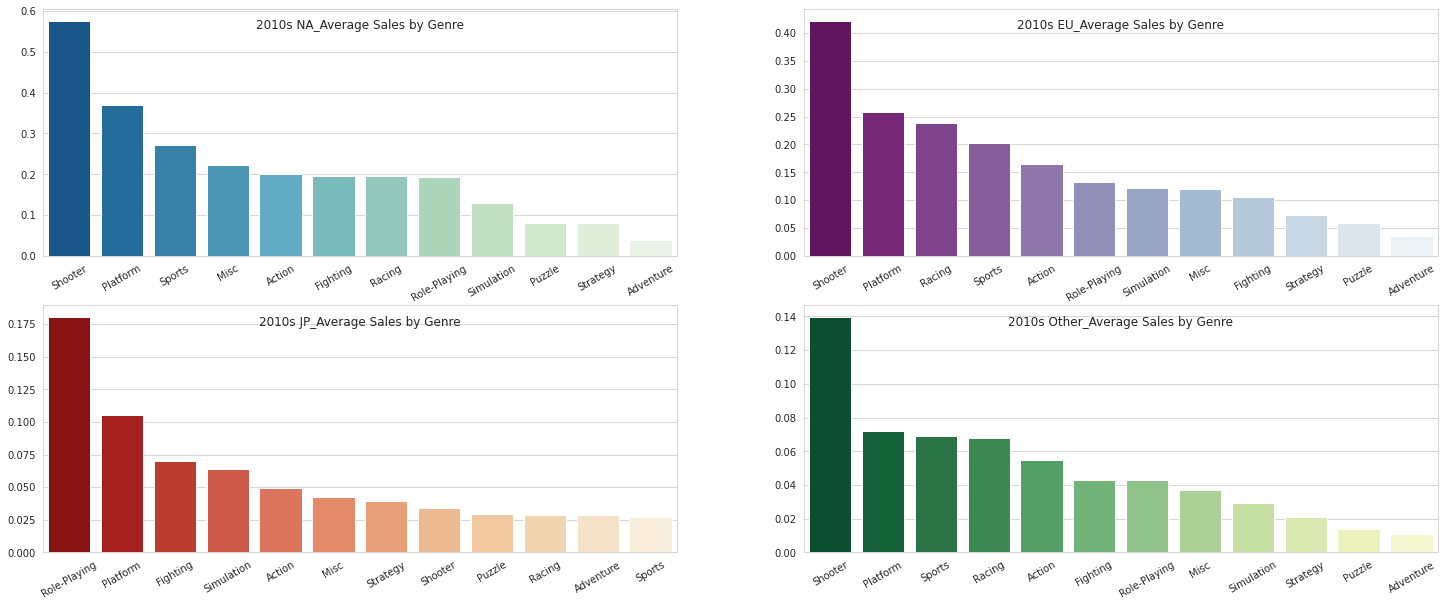

In [73]:
# 시각화
sns.set_style('whitegrid')

fig = plt.figure(figsize = (25,10))

area01 = fig.add_subplot(221)
sns.barplot(x='Genre', y='NA_Sales', data=NA2010_mean, ci=None, palette = "GnBu_r")
plt.title('2010s NA_Average Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area02 = fig.add_subplot(222)
sns.barplot(x='Genre', y='EU_Sales', data=EU2010_mean, ci=None, palette = "BuPu_r")
plt.title('2010s EU_Average Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area03 = fig.add_subplot(223)
sns.barplot(x='Genre', y='JP_Sales', data=JP2010_mean, ci=None, palette = "OrRd_r")
plt.title('2010s JP_Average Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
area04 = fig.add_subplot(224)
sns.barplot(x='Genre', y='Other_Sales', data=Other2010_mean, ci=None, palette = "YlGn_r")
plt.title('2010s Other_Average Sales by Genre', pad=-20)
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('')
plt.show()

> **🔎 설명** 
- 최근 10년간의 데이터에서도 총 출고량에서 Action 장르의 강세는 유효합니다.  
- 일본은 여전히 Role-Playing이 가장 높으나 Action 장르의 출고량이 유의미하게 높아졌습니다.  
- 평균 출고량에선 Shooter가 압도적으로 높습니다.
- 일본은 평균 출고량에서도 Role-Playing이 가장 높고, 타지역에서 순위가 낮은 Fighting, Simulation이 선전중입니다.

### **b. 2010년 이후 높은 출고량의 게임**

In [74]:
df_2010['Total_Sales'] = df_2010['NA_Sales'] + df_2010['EU_Sales'] + df_2010['JP_Sales'] + df_2010['Other_Sales']

In [75]:
# 최다출고량 탑20
df_game_2010 = df_2010.groupby(['Name', 'Genre'], as_index=False).sum().sort_values('Total_Sales', ascending=False).reset_index(drop=True)
df_game_top_2010 = df_game_2010.loc[:19, :].drop(columns='Year')
df_game_top_2010

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,Action,23.46,23.04,1.39,8.03,55.92
1,Call of Duty: Black Ops,Shooter,17.59,9.50,0.59,3.36,31.04
2,Call of Duty: Modern Warfare 3,Shooter,15.58,11.29,0.62,3.35,30.84
3,Call of Duty: Black Ops II,Shooter,14.08,11.05,0.72,3.88,29.73
4,Call of Duty: Ghosts,Shooter,14.92,9.05,0.48,2.92,27.37
5,Call of Duty: Black Ops 3,Shooter,11.89,9.56,0.43,3.42,25.30
6,Minecraft,Misc,10.82,8.85,1.15,2.93,23.75
7,Call of Duty: Advanced Warfare,Shooter,10.44,8.18,0.34,2.93,21.89
8,Kinect Adventures!,Misc,14.97,4.94,0.24,1.67,21.82
9,The Elder Scrolls V: Skyrim,Role-Playing,8.73,7.66,0.35,2.54,19.28


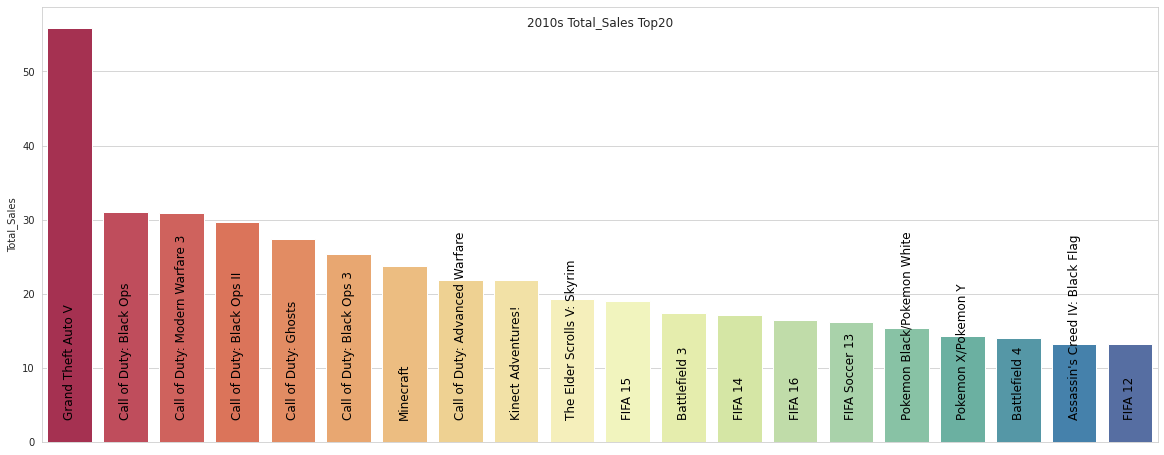

In [76]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (20,8))
p = sns.barplot(x='Name', y='Total_Sales', data=df_game_top_2010, palette='Spectral')
plt.title('2010s Total_Sales Top20', pad=-20)
plt.xlabel("")
plt.xticks([])

index = 0

for value in df_game_top_2010['Total_Sales']:
  p.text(index, 3, df_game_top_2010.Name[index], color='#000', size=12, rotation=90, ha='center', va='bottom')
  index += 1
plt.show()

> **🔎 설명** 
- 최근 10년간 가장 많은 출고량을 기록한 게임은 GTA5입니다.   
- Call of Duty, FIFA, Battlefield, Pokemon과 같이 Series로 제작된 게임의 강세가 특징이며 이는 게임IP의 강력함을 보여줍니다.

In [77]:
df_game2010 = df_tidy_2010.groupby(['Name', 'Genre', 'Country'], as_index=False).sum().sort_values('Sales', ascending=False).reset_index(drop=True)
df_game2010 = df_game2010.groupby(['Name', 'Country'], as_index=False).Sales.sum().sort_values('Sales', ascending=False).reset_index(drop=True)
df_game2010_NA = df_game2010.query("Country == 'NA'").reset_index(drop=True).loc[:4, :]
df_game2010_EU = df_game2010.query("Country == 'EU'").reset_index(drop=True).loc[:4, :]
df_game2010_JP = df_game2010.query("Country == 'JP'").reset_index(drop=True).loc[:4, :]
df_game2010_Other = df_game2010.query("Country == 'Other'").reset_index(drop=True).loc[:4, :]

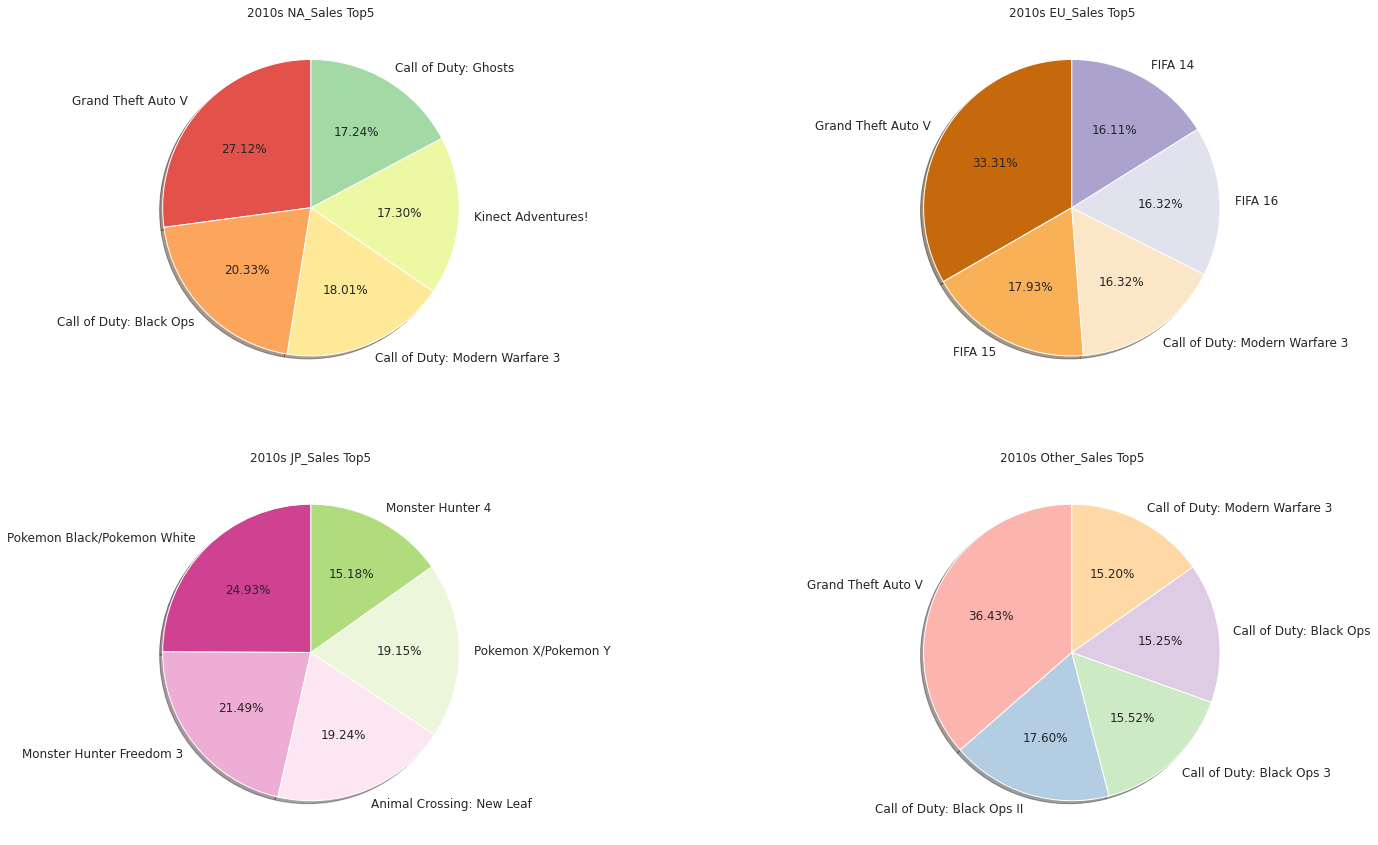

In [78]:
# 지역별 탑5
sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,15))

area01 = fig.add_subplot(221)
p1 = plt.pie(df_game2010_NA.Sales, labels=df_game2010_NA.Name, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'fontsize':12}, colors=sns.color_palette('Spectral'))
plt.title('2010s NA_Sales Top5')

area02 = fig.add_subplot(222)
p1 = plt.pie(df_game2010_EU.Sales, labels=df_game2010_EU.Name, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'fontsize':12}, colors=sns.color_palette('PuOr'))
plt.title('2010s EU_Sales Top5')

area03 = fig.add_subplot(223)
p1 = plt.pie(df_game2010_JP.Sales, labels=df_game2010_JP.Name, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'fontsize':12}, colors=sns.color_palette('PiYG'))
plt.title('2010s JP_Sales Top5')

area04 = fig.add_subplot(224)
p1 = plt.pie(df_game2010_Other.Sales, labels=df_game2010_Other.Name, shadow=True, startangle=90, autopct='%1.2f%%', textprops={'fontsize':12}, colors=sns.color_palette('Pastel1'))
plt.title('2010s Other_Sales Top5')

plt.show()

> **🔎 설명**  

- 지역별로 선호하는 게임 시리즈가 다르다는 것을 알 수 있습니다.  
  -북미의 Call of Duty, 유럽의 FIFA, 일본의 Pokemon과 Monster Hunter-
- 가장 많은 출고량을 기록한 GTA5가 일본 순위 안에 없다는 것도 특징입니다.

### **c. 2010년 이후 높은 출고량의 플랫폼**

In [79]:
df_platform_2010 = df_tidy_2010.groupby('Platform', as_index=False).sum().sort_values('Sales', ascending=False).reset_index(drop=True)

In [80]:
df_platform2010 = df_tidy_2010.groupby(['Platform', 'Country'], as_index=False).sum().sort_values('Sales', ascending=False).reset_index(drop=True)
df_platform2010_NA = df_platform2010[df_platform2010.Country == 'NA'].reset_index(drop=True).loc[:4, :]
df_platform2010_EU = df_platform2010[df_platform2010.Country == 'EU'].reset_index(drop=True).loc[:4, :]
df_platform2010_JP = df_platform2010[df_platform2010.Country == 'JP'].reset_index(drop=True).loc[:4, :]
df_platform2010_Other = df_platform2010[df_platform2010.Country == 'Other'].reset_index(drop=True).loc[:4, :]

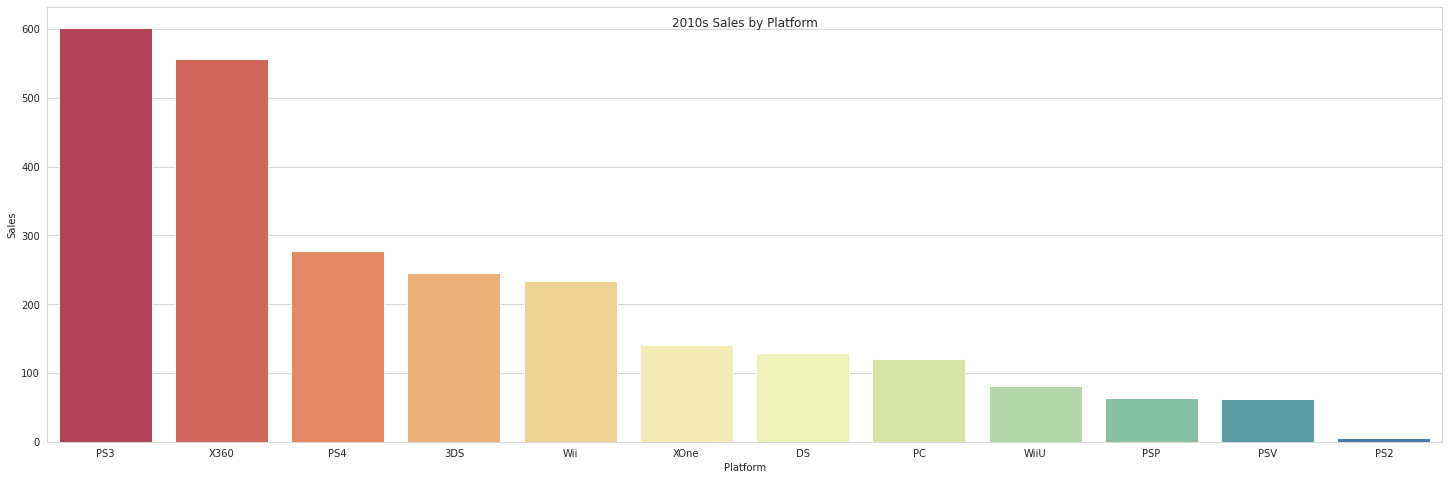

In [81]:
# 2010년 이후 전지역 플랫폼 탑10
sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,8))

p = sns.barplot(x='Platform', y='Sales', data=df_platform_2010, palette='Spectral')
plt.title('2010s Sales by Platform', pad=-20)

plt.show()

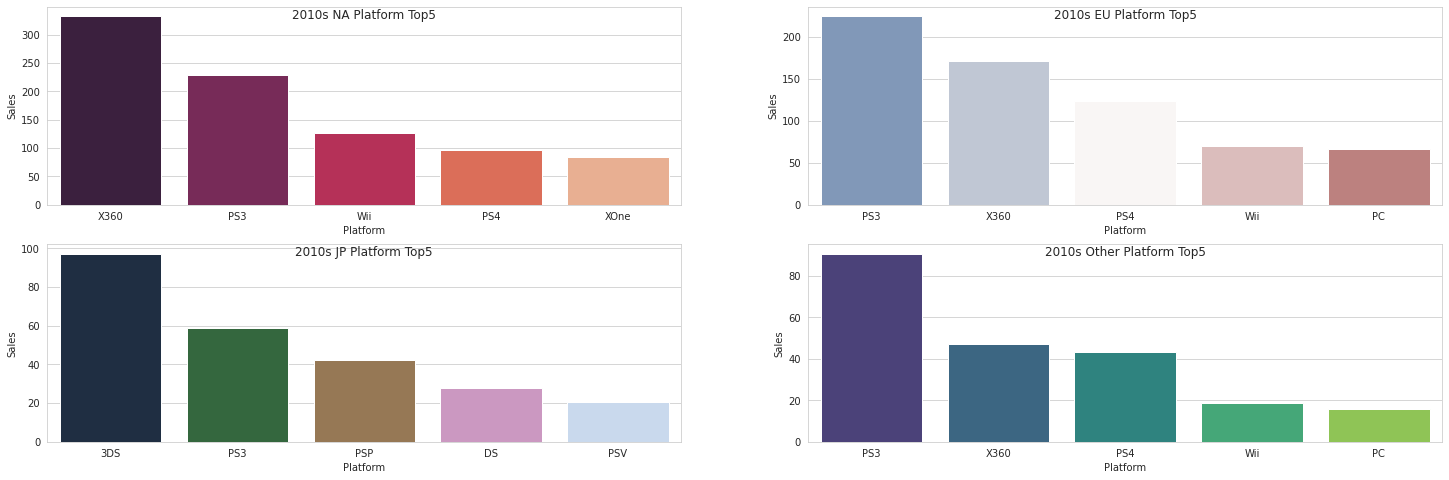

In [82]:
# 2010년 이후 지역별 플랫폼 탑5
sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,8))

area02 = fig.add_subplot(221)
sns.barplot(x='Platform', y='Sales', data=df_platform2010_NA, palette='rocket')
plt.title('2010s NA Platform Top5', pad=-12)

area03 = fig.add_subplot(222)
sns.barplot(x='Platform', y='Sales', data=df_platform2010_EU, palette='vlag')
plt.title('2010s EU Platform Top5', pad=-12)

area04 = fig.add_subplot(223)
sns.barplot(x='Platform', y='Sales', data=df_platform2010_JP, palette='cubehelix')
plt.title('2010s JP Platform Top5', pad=-12)

area05 = fig.add_subplot(224)
sns.barplot(x='Platform', y='Sales', data=df_platform2010_Other, palette='viridis')
plt.title('2010s Other Platform Top5', pad=-12)

plt.show()

> **🔎 설명**  
- 출고량이 가장 높았던 PS2가 최하위로 밀려났습니다.
- PS3가 X360을 앞서면서 1위 싸움이 치열합니다.
- PS4가 상승세를 보이고 있다는 것도 특징입니다.
- 북미는 여전히 X360가 가장 높으며 PS3이 추격중입니다.
- 유럽 지역에서 주목할 점은 최신 기종인 PS4의 출고량이 상당히 높다는 점입니다. 여전히 타지역보다 트랜디한 모습을 보이고 있습니다.  
- 일본은 DS의 자리를 3DS가 대체하면서 3DS가 1위로 올라섰고, X360은 여전히 외면받고 있습니다.

### **d. Call of Duty 시리즈**  
2010년대 게임 중 가장 눈에 띄는 게임은 Call of Duty 시리즈입니다.  
게임별 출고량 탑10에 6개의 타이틀이 올라가 있으며 2010년대 Shooter 장르의 상승세에도 지대한 영향을 끼친 것으로 보입니다.

In [83]:
Duty = df_2010[df_2010['Name'].str.contains('Call of Duty')].sort_values('Year').reset_index(drop=True)
Duty = Duty.drop(index=[2, 10, 11, 32, 33]).reset_index(drop=True)
Duty_N = Duty.groupby('Name', as_index=False).sum()
Duty_P = Duty.groupby('Platform', as_index=False).sum()
Duty_Y = Duty.groupby('Year', as_index=False).sum()

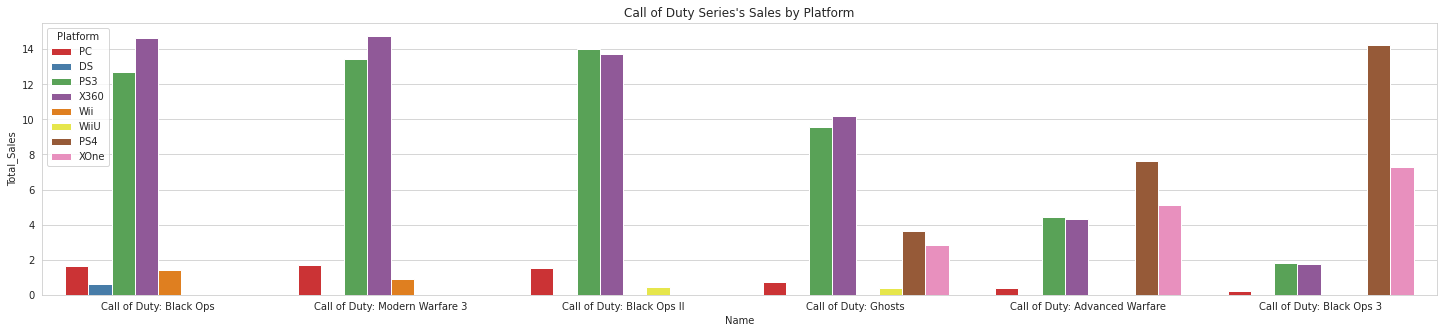

In [84]:
# Call of Duty Series's Sales by Platform
sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,5))
sns.barplot(x='Name', y='Total_Sales', hue='Platform', data=Duty, ci=None, palette = "Set1")
plt.title("Call of Duty Series's Sales by Platform")
plt.show()

In [85]:
#플랫폼별 연도별
Duty2 = Duty.query("Platform == ['PS3', 'PS4', 'XOne', 'X360']").sort_values('Platform').reset_index(drop=True)
Duty2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
1,Call of Duty: Advanced Warfare,PS3,2014,Shooter,Activision,1.54,1.94,0.19,0.77,4.44
2,Call of Duty: Black Ops 3,PS3,2015,Shooter,Activision,0.49,0.96,0.07,0.27,1.79
3,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,4.09,3.73,0.38,1.38,9.58
5,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
6,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,1.78,1.42,0.05,0.38,3.63
7,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61
8,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
9,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76


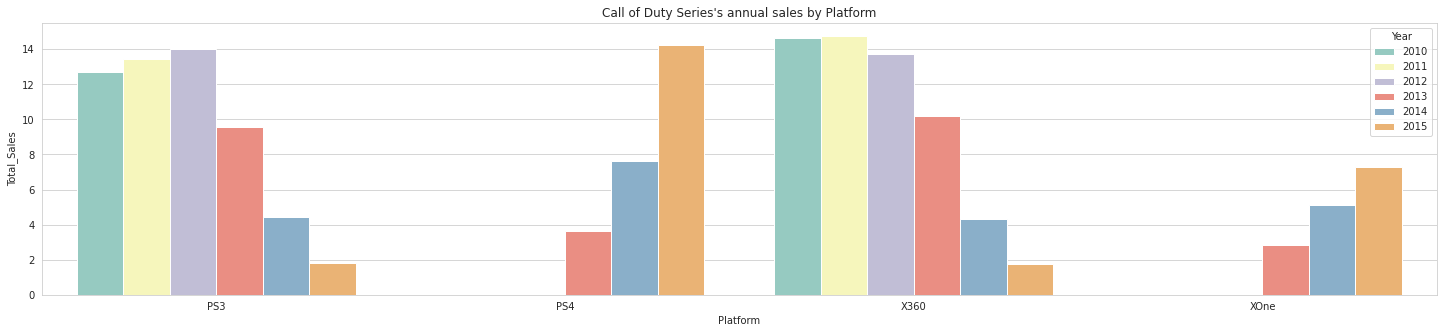

In [86]:
# call of duty 플랫폼별 연간 판매량

sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,5))
sns.barplot(x='Platform', y='Total_Sales', hue='Year', data=Duty2, estimator=np.sum, ci=None, palette = "Set3")
plt.title("Call of Duty Series's annual sales by Platform")
plt.show()

> **🔎 설명**  
- 각각 동시대 플랫폼이라 할 수 있는 PS3와 X360에서 PS4와 XOne으로 자연스럽게 넘어가는 모습을 확인할 수 있습니다.
- PS3와 X360가 주력일 시기엔 균형을 이루고 있으나 PS4와 XOne의 시기엔 PS4의 출고량이 XOne보다 두배 가까이 높습니다.

### **e. 플랫폼별 연간 총 출고량**  

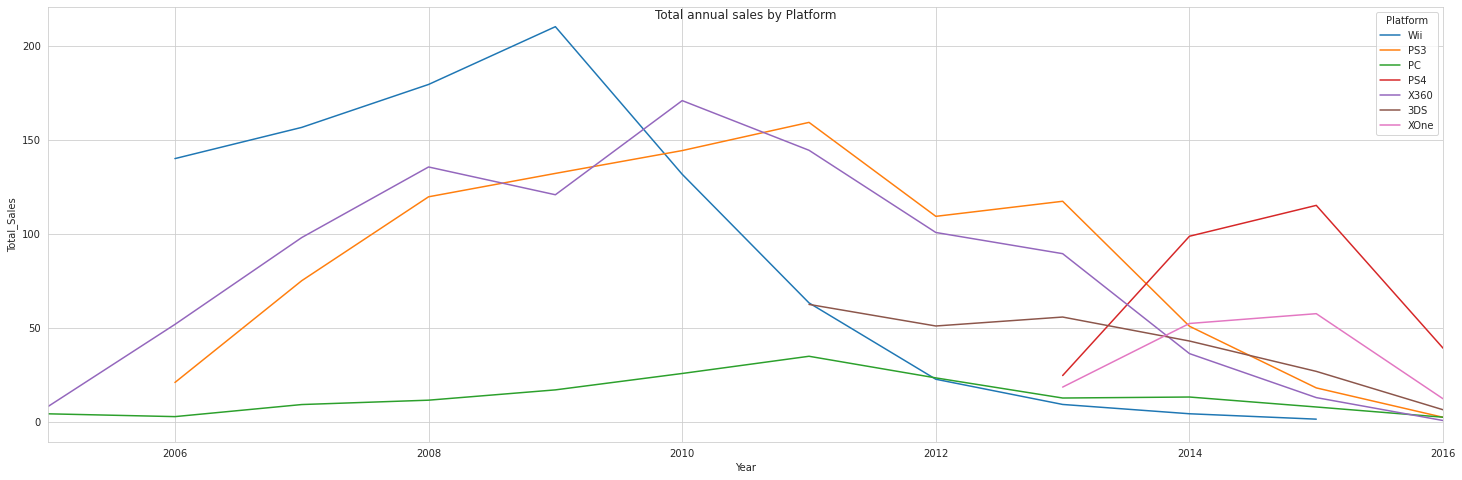

In [87]:
df2 = df_clean.iloc[:, [1,2,9]]
df2_P7 = df2.query("Platform == 'PS3' | Platform == 'PS4' | Platform == 'X360' | Platform == 'XOne' | Platform == '3DS' | Platform == 'Wii' | Platform == 'PC'")
df2_P7.reset_index(drop=True)

sns.set_style('whitegrid')
fig = plt.figure(figsize = (25,8))

sns.lineplot(data=df2_P7, x="Year", y="Total_Sales", hue = 'Platform', estimator=np.sum, ci=None )
plt.xlim([2005, 2016])
plt.title('Total annual sales by Platform', pad=-12)

plt.show()

> **🔎 설명**  
- 게임 시장의 규모가 감소추세를 보이고 있긴 하지만 어려운 상황에서도 PS4의 약진이 눈에 띕니다.
- PC게임 시장 규모는 비디오 게임 시장에 비해 작은 편이지만 안정적인 흐름을 보여주고 있습니다.

# **5. 결론**

## 2010년 이후 출시 게임 분석  
- 이번 분석은 다음 분기에 설계할 게임에 그 목적이 있는 바, 최신 트랜드에 주목  
2010년 이후의 데이터를 취사선택하여 데이터 분석

## Action의 함정, Shooter에 주목  
- Action장르의 강세는 출시한 게임수의 영향  
- Shooter 장르의 선호도가 가장 높음
- 일본까지 고려하면 Platform 장르도 고려 대상임

## 시대에 맞는 플랫폼
- 출고량이 가장 높았던 PS2는 2010년대에 최하위를 기록
- PS3와 X360이 강세이나 PS4와 XOne의 상승세에 주목해야 함
- PC게임 시장은 비디오게임 시장에 비해 규모는 작으나 흐름이 안정적

## 결이 다른 일본
- 전 세계에서 가장 많은 출고량을 기록한 GTA5의 저조한 성적
- 일본은 Role-Playing장르가 압도적 / Shooter는 하위권
- DS의 자리를 DS3가 대체하면서 1위 플랫폼으로 등극
- XBox Series는 점유율이 낮음

## 게임 IP(Intellectual Property)의 강력함
- Call of Duty, FIFA, Battlefield, Pokemon과 같이 Series로 제작된 게임이 출고량 상위권 독식
- 지역별로 선호하는 게임 시리즈 : 북미의 Call of Duty, 유럽의 FIFA, 일본의 Pokemon과 Monster Hunter

## 결론
- 기본적으로는 Shooter 장르의 게임을 PS4와 XOne 플랫폼을 대상으로 설계
- 일본 시장까지 고려한다면 Platform 장르와 PS4 플랫폼을 대상으로 삼는 것도 좋은 선택  
- 장기적 관점에서 강력한 IP를 만들기 위해 세계관 형성 및 매력적인 캐릭터 창조
